#### A: Ознакомление с датасетом
В этой и последующих задачах мы будем работать с датасетом преступлений в Чикаго за 2015 год. Ознакомиться с полной версией датасета можно по ссылке: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data. В датасет была добавлена колонка 'Counts', связанная с количеством преступлений.

В качестве учебной практики мы зададимся вопросом, как изменяется количество преступлений. Колонка 'Counts' будет для нас зависимой переменной. Перед основным анализом вам необходимо вывести информацию о датасете с помощью фунции info().

Датасет доступен под названием "Crimes_2015.csv"

In [1]:
import pandas as pd

df = pd.read_csv('Crimes_2015.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16649 entries, 0 to 16648
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dates                 16649 non-null  object 
 1   Primary Type          16649 non-null  object 
 2   Location Description  16649 non-null  object 
 3   Arrest                16649 non-null  int64  
 4   Domestic              16649 non-null  int64  
 5   Ward                  16649 non-null  float64
 6   Counts                16649 non-null  int64  
 7   District              16649 non-null  int64  
 8   Primary Types         16649 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.1+ MB
None


#### B: Проверка зависимой переменной на нормальность
Одно из условий зависимой переменной является нормальное распределение. Мы нарисовали распределение зависимой переменной. Вам необходимо посмотреть на график и определить какая формулировка подходит к распределению на рисунке больше всего:

1. На графике представлено нормальное распределение.
2. Распределение напоминает нормальное, но оно смещено вправо.
3. Распределение напоминает нормальное, но они смещено влево.
4. Зависимая переменная распределена ненормально.

Пример записи ответа: print('5').

Датасет доступен под названием "Crimes_2015.csv"

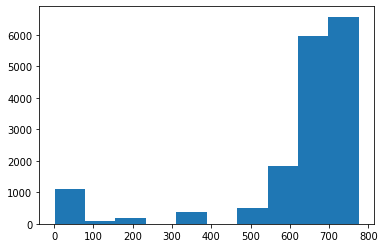

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Crimes_2015.csv')

plt.hist(df['Counts'])
plt.show()

# print('2') ???

#### C: Просмотр дескриптивной статистики
В предыдущей задаче мы рассматривали распределение зависимой переменной, а теперь мы хотим посмотреть на распределение количественных переменных, которые есть в датасете.

Выведите описательную статистику по каждой переменной с помощью функции df.describe().

Датасет доступен под названием "Crimes_2015.csv"

In [ ]:
import pandas as pd

df = pd.read_csv('Crimes_2015.csv')

print(df.describe())

             Arrest      Domestic          Ward        Counts      District  \
count  16649.000000  16649.000000  16649.000000  16649.000000  16649.000000   
mean       0.247883      0.161751     22.761487    621.183014     11.227821   
std        0.431796      0.368234     13.945305    189.768234      6.887076   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        0.000000      0.000000     10.000000    626.000000      6.000000   
50%        0.000000      0.000000     22.000000    677.000000     10.000000   
75%        0.000000      0.000000     34.000000    724.000000     17.000000   
max        1.000000      1.000000     50.000000    776.000000     31.000000   

       Primary Types  
count   16649.000000  
mean       13.892366  
std        11.063366  
min         0.000000  
25%         2.000000  
50%         9.000000  
75%        26.000000  
max        30.000000  


#### D: Линейная регрессия
Мы будет анализировать зависимую переменную 'Counts' по следующим переменным: 'Ward', 'District', 'Primary Types', 'Domestic', 'Arrest'. C помощью кода, представленного ниже, мы вывели модели линейной регрессии.

Посмотрите на результаты выдачи и выведите названия переменных, p-value которых меньше 0,05.

Датасет доступен под названием "Crimes_2015.csv"

Формат ввода
print('Ward')

Формат вывода
Ward

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

df = pd.read_csv('Crimes_2015.csv')

X = df[['Ward', 'District', 'Primary Types', 'Domestic', 'Arrest']]
Y = df['Counts']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

# print('Primary Types', 'Domestic', 'Arrest')

                            OLS Regression Results                            
Dep. Variable:                 Counts   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     46.66
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           4.65e-48
Time:                        21:16:14   Log-Likelihood:            -1.1084e+05
No. Observations:               16649   AIC:                         2.217e+05
Df Residuals:                   16643   BIC:                         2.217e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Ward             -0.1141      0.144     -0.791

#### F: Линейная регрессия (2)
Мы будет анализировать зависимую переменную 'Counts' по переменным, у которых p-value было меньше 0.05. Это переменные: 'Primary Types', 'Domestic', 'Arrest'.

Ответьте на вопрос: улучшилось ли качество модели после удаление из нее двух независимых переменных?

Выберите один вариант ответа:

1. R2 квадрат не изменился, переменные 'Ward', 'District' не добавляли качество модели.
2. R2 квадрат изменился, переменные 'Ward', 'District' делали модель лучше.

Датасет доступен под названием "Crimes_2015.csv"

Формат ввода
print('3')

Формат вывода
3

In [15]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import pandas as pd

df = pd.read_csv('Crimes_2015.csv')

X = df[['Primary Types', 'Domestic', 'Arrest']]
Y = df['Counts']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

# print('1')

                            OLS Regression Results                            
Dep. Variable:                 Counts   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     77.09
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.63e-49
Time:                        21:29:21   Log-Likelihood:            -1.1085e+05
No. Observations:               16649   AIC:                         2.217e+05
Df Residuals:                   16645   BIC:                         2.217e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Primary Types    -0.4799      0.138     -3.476

#### G: Выбор наилучшей модели
Мы с вами создали две модели линейной регрессии. Выберите модель, которая лучше предсказывает количество совершенных преступлений в Чикаго.

Первая модель содержала следующие независимые переменные: ['Ward', 'District', 'Primary Types', 'Domestic', 'Arrest']
Вторая модель содержала следующие независимые пременные: ['Primary Types', 'Domestic', 'Arrest']
Выведите в выдачи, какая модель является наилучшей.

Датасет доступен под названием "Crimes_2015.csv"

Формат ввода
print('3')

Формат вывода
3

In [14]:
print('2')

2


#### H: Проверка допущения о мультиколлинеарности
Наилучшей моделью оказалась модель со следущими независимыми переменными ['Primary Types', 'Domestic', 'Arrest']. Теперь нам необходимо понять соблюдается ли допущение модели на мультикорреляции.

Напоминаем, "Мы можем использовать VIF (Variance Inflation Factor). Если он будет больше четырех (ещё одно консенсусное значение, такое же как p-value или минимальное число наблюдений в группе), то это значит, что эта переменная коррелирована с какой-то из присутствующих и её нужно убрать из модели".

Выведите названия всех независимых переменных, которые проходят проверку на мультиколлинеарность.

Формат ввода
print('Ward')

Формат вывода
Ward

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Primary Types', 'Domestic', 'Arrest']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

# print('Primary Types', 'Domestic', 'Arrest')

         feature       VIF
0  Primary Types  1.216226
1       Domestic  1.034569
2         Arrest  1.219746
